# Clouseau Project

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('water_use.txt', sep='\t', error_bad_lines=False, skiprows=range(0, 311))

In [3]:
df = df.drop(0)
df.to_csv('water_use.csv')

In [4]:
df = df.replace('-','')
df = df.apply( lambda x: pd.to_numeric(x, errors='ignore') )

df.state_name.unique()

array(['Utah'], dtype=object)

In [18]:
list(df.columns)[:]

['state_cd',
 'state_name',
 'county_cd',
 'county_nm',
 'year',
 'Total Population total population of area, in thousands',
 'Public Supply population served by groundwater, in thousands',
 'Public Supply population served by surface water, in thousands',
 'Public Supply total population served, in thousands',
 'Public Supply self-supplied groundwater withdrawals, fresh, in Mgal/d',
 'Public Supply self-supplied groundwater withdrawals, saline, in Mgal/d',
 'Public Supply total self-supplied withdrawals, groundwater, in Mgal/d',
 'Public Supply self-supplied surface-water withdrawals, fresh, in Mgal/d',
 'Public Supply self-supplied surface-water withdrawals, saline, in Mgal/d',
 'Public Supply total self-supplied withdrawals, surface water, in Mgal/d',
 'Public Supply total self-supplied withdrawals, fresh, in Mgal/d',
 'Public Supply total self-supplied withdrawals, saline, in Mgal/d',
 'Public Supply total self-supplied withdrawals, total, in Mgal/d',
 'Public Supply deliveries to 

In [6]:
df["Total Population total population of area, in thousands"] = \
df["Total Population total population of area, in thousands"].astype(float).fillna(0.0)

In [13]:
pop = pd.pivot_table(df, values="Total Population total population of area, in thousands", 
               index=['county_nm'], 
               columns=['year'],
               aggfunc=np.sum)

In [14]:
pop.head()

year,1985,1990,1995,2000,2005,2010
county_nm,,,,,,
Beaver County,5.2,4.76,5.38,6.01,6.341,6.629
Box Elder County,36.8,36.49,39.59,42.75,45.304,49.975
Cache County,64.8,70.18,77.30,91.39,103.564,112.656
Carbon County,23.1,20.23,20.65,20.42,19.338,21.403
Daggett County,0.8,0.69,0.77,0.92,0.963,1.059


In [19]:
public = [col for col in list(df) if col.startswith('Public')]
public

['Public Supply population served by groundwater, in thousands',
 'Public Supply population served by surface water, in thousands',
 'Public Supply total population served, in thousands',
 'Public Supply self-supplied groundwater withdrawals, fresh, in Mgal/d',
 'Public Supply self-supplied groundwater withdrawals, saline, in Mgal/d',
 'Public Supply total self-supplied withdrawals, groundwater, in Mgal/d',
 'Public Supply self-supplied surface-water withdrawals, fresh, in Mgal/d',
 'Public Supply self-supplied surface-water withdrawals, saline, in Mgal/d',
 'Public Supply total self-supplied withdrawals, surface water, in Mgal/d',
 'Public Supply total self-supplied withdrawals, fresh, in Mgal/d',
 'Public Supply total self-supplied withdrawals, saline, in Mgal/d',
 'Public Supply total self-supplied withdrawals, total, in Mgal/d',
 'Public Supply deliveries to domestic, in Mgal/d',
 'Public Supply deliveries to commercial, in Mgal/d',
 'Public Supply deliveries to industrial, in Mgal

In [20]:
df[public]

,"Public Supply population served by groundwater, in thousands","Public Supply population served by surface water, in thousands","Public Supply total population served, in thousands","Public Supply self-supplied groundwater withdrawals, fresh, in Mgal/d","Public Supply self-supplied groundwater withdrawals, saline, in Mgal/d","Public Supply total self-supplied withdrawals, groundwater, in Mgal/d","Public Supply self-supplied surface-water withdrawals, fresh, in Mgal/d","Public Supply self-supplied surface-water withdrawals, saline, in Mgal/d","Public Supply total self-supplied withdrawals, surface water, in Mgal/d","Public Supply total self-supplied withdrawals, fresh, in Mgal/d",...,"Public Supply total self-supplied withdrawals, total, in Mgal/d","Public Supply deliveries to domestic, in Mgal/d","Public Supply deliveries to commercial, in Mgal/d","Public Supply deliveries to industrial, in Mgal/d","Public Supply deliveries to thermoelectric, in Mgal/d","Public Supply total deliveries, in Mgal/d","Public Supply public use and losses, in Mgal/d","Public Supply per capita use, in gallons/person/day","Public Supply reclaimed wastewater, in Mgal/d",Public Supply number of facilities
1,4.57,0.00,4.570,1.69,NaN,NaN,0.00,NaN,NaN,1.69,...,NaN,1.21,0.11,0.06,0.00,1.38,NaN,NaN,NaN,NaN
2,4.70,0.00,4.700,2.02,NaN,NaN,0.00,NaN,NaN,2.02,...,NaN,1.06,0.11,0.09,0.00,1.26,NaN,NaN,NaN,4.0
3,4.58,0.00,4.580,1.85,0.0,1.85,0.00,0.0,0.00,1.85,...,1.85,1.40,0.32,0.01,0.00,1.73,0.12,404.0,0.0,4.0
4,NaN,NaN,4.775,2.16,0.0,2.16,0.01,0.0,0.01,2.17,...,2.17,NaN,NaN,NaN,NaN,NaN,NaN,454.0,0.0,NaN
5,NaN,NaN,5.120,1.96,0.0,1.96,0.00,0.0,0.00,1.96,...,1.96,1.49,NaN,NaN,NaN,NaN,NaN,383.0,NaN,NaN
6,NaN,NaN,5.520,2.38,0.0,2.38,0.00,0.0,0.00,2.38,...,2.38,1.50,NaN,NaN,NaN,NaN,NaN,431.0,0.0,NaN
7,34.83,0.81,35.640,28.35,NaN,NaN,0.97,NaN,NaN,29.32,...,NaN,24.23,0.22,0.05,0.00,24.50,NaN,NaN,NaN,NaN
8,33.60,0.00,33.600,16.04,NaN,NaN,0.00,NaN,NaN,16.04,...,NaN,7.50,1.39,0.02,0.00,8.91,NaN,NaN,NaN,20.0
9,31.91,0.00,31.910,25.11,0.0,25.11,0.00,0.0,0.00,25.11,...,25.11,6.95,2.14,0.12,0.00,9.21,15.90,787.0,0.0,15.0
10,NaN,NaN,38.944,13.84,0.0,13.84,8.97,0.0,8.97,22.81,...,22.81,NaN,NaN,NaN,NaN,NaN,NaN,586.0,0.0,NaN


In [33]:
pub = pd.pivot_table(df, values=public, 
               index=['county_nm'], 
               columns=['year'],
               aggfunc=np.sum)

In [37]:
pub.head()

Public Supply population served by groundwater, in thousands  \
year                                                                     1985   
county_nm                                                                       
Beaver County                                                  4.57             
Box Elder County                                              34.83             
Cache County                                                  61.47             
Carbon County                                                 12.40             
Daggett County                                                 0.54             

                                               \
year               1990   1995 2000 2005 2010   
county_nm                                       
Beaver County      4.70   4.58  NaN  NaN  NaN   
Box Elder County  33.60  31.91  NaN  NaN  NaN   
Cache County      66.88  69.16  NaN  NaN  NaN   
Carbon County      9.92   9.94  NaN  NaN  NaN   
Daggett County     0.29   0.59  NaN  NaN  NaN   

                 Public Supply population served by surface water, in thousands  \
year                                                                       1985   
county_nm                                                                         
Beaver County                                                  0.00               
Box Elder County                                               0.81               
Cache County                                                   0.03               
Carbon County                                                  7.42               
Daggett County                                                 0.19               

                                  ...   \
year              1990  1995 2000 ...    
county_nm                         ...    
Beaver County     0.00  0.00  NaN ...    
Box Elder County  0.00  0.00  NaN ...    
Cache County      0.07  0.00  NaN ...    
Carbon County     6.07  5.87  NaN ...    
Daggett County    0.21  0.09  NaN ...    

                 Public Supply reclaimed wastewater, in Mgal/d                 \
year                                                      1995 2000 2005 2010   
county_nm                                                                       
Beaver County                                              0.0  0.0  NaN  0.0   
Box Elder County                                           0.0  0.0  NaN  0.0   
Cache County                                               0.0  0.0  NaN  0.0   
Carbon County                                              0.0  0.0  NaN  0.0   
Daggett County                                             0.0  0.0  NaN  0.0   

                 Public Supply number of facilities                             
year                                           1985  1990  1995 2000 2005 2010  
county_nm                                                                       
Beaver County                                   NaN   4.0   4.0  NaN  NaN  NaN  
Box Elder County                                NaN  20.0  15.0  NaN  NaN  NaN  
Cache County                                    NaN  23.0  20.0  NaN  NaN  NaN  
Carbon County                                   NaN  14.0   9.0  NaN  NaN  NaN  
Daggett County                                  NaN   5.0   5.0  NaN  NaN  NaN  

[5 rows x 126 columns]

In [39]:
twenty_ten = df[df['year']==2010]

In [67]:
years = pd.pivot_table(twenty_ten, values=public, 
               index=['county_nm'], 
               aggfunc=np.sum)

In [68]:
years.head()

,"Public Supply deliveries to commercial, in Mgal/d","Public Supply deliveries to domestic, in Mgal/d","Public Supply deliveries to industrial, in Mgal/d","Public Supply deliveries to thermoelectric, in Mgal/d",Public Supply number of facilities,"Public Supply per capita use, in gallons/person/day","Public Supply population served by groundwater, in thousands","Public Supply population served by surface water, in thousands","Public Supply public use and losses, in Mgal/d","Public Supply reclaimed wastewater, in Mgal/d",...,"Public Supply self-supplied groundwater withdrawals, saline, in Mgal/d","Public Supply self-supplied surface-water withdrawals, fresh, in Mgal/d","Public Supply self-supplied surface-water withdrawals, saline, in Mgal/d","Public Supply total deliveries, in Mgal/d","Public Supply total population served, in thousands","Public Supply total self-supplied withdrawals, fresh, in Mgal/d","Public Supply total self-supplied withdrawals, groundwater, in Mgal/d","Public Supply total self-supplied withdrawals, saline, in Mgal/d","Public Supply total self-supplied withdrawals, surface water, in Mgal/d","Public Supply total self-supplied withdrawals, total, in Mgal/d"
county_nm,,,,,,,,,,,,,,,,,,,,,
Beaver County,NaN,1.50,NaN,NaN,NaN,431.0,NaN,NaN,NaN,0.0,...,0.0,0.00,0.0,NaN,5.520,2.38,2.38,0.0,0.00,2.38
Box Elder County,NaN,9.38,NaN,NaN,NaN,332.0,NaN,NaN,NaN,0.0,...,0.0,0.00,0.0,NaN,47.890,15.89,15.89,0.0,0.00,15.89
Cache County,NaN,20.59,NaN,NaN,NaN,311.0,NaN,NaN,NaN,0.0,...,0.0,0.36,0.0,NaN,107.580,33.47,33.11,0.0,0.36,33.47
Carbon County,NaN,4.00,NaN,NaN,NaN,293.0,NaN,NaN,NaN,0.0,...,0.0,3.13,0.0,NaN,21.080,6.18,3.05,0.0,3.13,6.18
Daggett County,NaN,0.21,NaN,NaN,NaN,1374.0,NaN,NaN,NaN,0.0,...,0.0,0.08,0.0,NaN,0.597,0.82,0.74,0.0,0.08,0.82


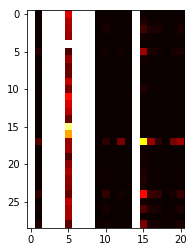

In [46]:
import matplotlib.pyplot as plt
import numpy as np

a = year
plt.imshow(a, cmap='hot', interpolation='nearest')
plt.show()

In [56]:
#from urllib2 import urlopen
import numpy as np
%pylab inline

page = "http://datasets.flowingdata.com/ppg2008.csv"
nba = pd.read_csv(page, index_col=0)

# Normalize data columns
nba_norm = (nba - nba.mean()) / (nba.max() - nba.min())

# Sort data according to Points, lowest to highest
# This was just a design choice made by Yau
# inplace=False (default) ->thanks SO user d1337
nba_sort = nba_norm.sort('PTS', ascending=True)

nba_sort

Populating the interactive namespace from numpy and matplotlib


//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,G,MIN,PTS,FGM,FGA,FGP,FTM,FTA,FTP,3PM,3PA,3PP,ORB,DRB,TRB,AST,STL,BLK,TO,PF
Name,,,,,,,,,,,,,,,,,,,,
Nate Robinson,0.055439,-0.645253,-0.281692,-0.243571,-0.188704,-0.165327,-0.208750,-0.235190,0.069274,0.182143,0.282286,-0.015,-0.014872,-0.248571,-0.172281,0.025208,0.072500,-0.177857,-0.216667,0.140000
Allen Iverson,-0.242807,0.041616,-0.258615,-0.243571,-0.123889,-0.265829,0.010000,0.030633,-0.098324,-0.246429,-0.217714,-0.057,-0.220000,-0.261558,-0.251228,0.118958,0.155833,-0.177857,0.075000,-0.401667
Rashard Lewis,0.143158,-0.008889,-0.243231,-0.243571,-0.197963,-0.155276,-0.302500,-0.311139,0.055307,0.575000,0.539429,0.057,-0.040513,0.011169,-0.014386,-0.131042,-0.052500,0.000714,-0.175000,0.015000
Chauncey Billups,0.143158,-0.099798,-0.243231,-0.404286,-0.327593,-0.260804,0.088125,-0.007342,0.270391,0.325000,0.253714,0.068,-0.245641,-0.248571,-0.251228,0.264792,0.030833,-0.142143,-0.091667,-0.193333
Shaquille O'neal,0.072982,-0.625051,-0.235538,-0.118571,-0.438704,0.698995,-0.099375,0.131899,-0.617877,-0.425000,-0.460571,-0.340,0.292821,0.180000,0.222456,-0.224792,-0.177500,0.286429,-0.091667,0.390000
Maurice Williams,0.178246,-0.130101,-0.235538,-0.172143,-0.188704,-0.014573,-0.333750,-0.387089,0.267598,0.396429,0.282286,0.096,-0.194359,-0.209610,-0.216140,0.025208,-0.094167,-0.177857,-0.091667,0.098333
Josh Howard,-0.330526,-0.443232,-0.220154,-0.118571,-0.077593,-0.094975,-0.224375,-0.209873,-0.095531,-0.032143,-0.003429,0.005,-0.066154,-0.079740,-0.067018,-0.235208,-0.010833,0.000714,-0.300000,0.056667
LaMarcus Aldridge,0.178246,0.082020,-0.212462,-0.011429,-0.059074,0.070854,-0.240000,-0.222532,-0.098324,-0.389286,-0.417714,-0.090,0.395385,0.011169,0.143509,-0.203958,-0.052500,0.143571,-0.383333,0.056667
Ray Allen,0.143158,0.001212,-0.204769,-0.207857,-0.253519,0.050754,-0.271250,-0.336456,0.379330,0.467857,0.425143,0.069,-0.143077,-0.235584,-0.207368,-0.110208,-0.094167,-0.142143,-0.300000,-0.193333


In [70]:
year_cln = years.dropna(axis=1)

Populating the interactive namespace from numpy and matplotlib


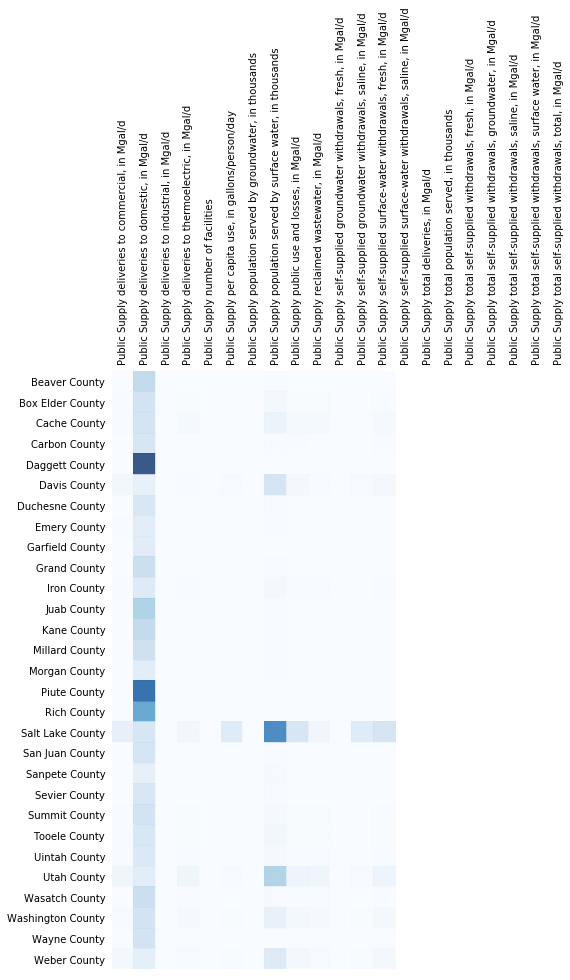

In [73]:
# <nbformat>3.0</nbformat>

# ------------------------------------------------------------------------
# Filename   : heatmap.py
# Date       : 2013-04-19
# Updated    : 2014-01-04
# Author     : @LotzJoe >> Joe Lotz
# Description: My attempt at reproducing the FlowingData graphic in Python
# Source     : http://flowingdata.com/2010/01/21/how-to-make-a-heatmap-a-quick-and-easy-solution/
#
# Other Links:
#     http://stackoverflow.com/questions/14391959/heatmap-in-matplotlib-with-pcolor
#
# ------------------------------------------------------------------------

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%pylab inline

  #page = urlopen("http://datasets.flowingdata.com/ppg2008.csv")
  #nba = pd.read_csv(page, index_col=0)

# Normalize data columns
  #nba_norm = (nba - nba.mean()) / (nba.max() - nba.min())

# Sort data according to Points, lowest to highest
# This was just a design choice made by Yau
# inplace=False (default) ->thanks SO user d1337
  #nba_sort = nba_norm.sort('PTS', ascending=True)

year.head(10)

# Plot it out
fig, ax = plt.subplots()
heatmap = ax.pcolor(year_cln, cmap=plt.cm.Blues, alpha=0.8)

# Format
fig = plt.gcf()
fig.set_size_inches(8, 11)

# turn off the frame
ax.set_frame_on(False)

# put the major ticks at the middle of each cell
ax.set_yticks(np.arange(year.shape[0]) + 0.5, minor=False)
ax.set_xticks(np.arange(year.shape[1]) + 0.5, minor=False)

# want a more natural, table-like display
ax.invert_yaxis()
ax.xaxis.tick_top()

# Set the labels

# label source:https://en.wikipedia.org/wiki/Basketball_statistics
#labels = ['year']

# note I could have used nba_sort.columns but made "labels" instead
ax.set_xticklabels(year.columns, minor=False)
ax.set_yticklabels(year.index, minor=False)

# rotate the
plt.xticks(rotation=90)

ax.grid(False)

# Turn off all the ticks
ax = plt.gca()

for t in ax.xaxis.get_major_ticks():
    t.tick1On = False
    t.tick2On = False
for t in ax.yaxis.get_major_ticks():
    t.tick1On = False
t.tick2On = False

In [94]:
tot_del = df[['year'] + public[-6:]].set_index('year')

In [93]:
public[-6:]

['Public Supply deliveries to thermoelectric, in Mgal/d',
 'Public Supply total deliveries, in Mgal/d',
 'Public Supply public use and losses, in Mgal/d',
 'Public Supply per capita use, in gallons/person/day',
 'Public Supply reclaimed wastewater, in Mgal/d',
 'Public Supply number of facilities']

In [110]:
tot_del['Public Supply deliveries to thermoelectric, in Mgal/d']

year
1985    0.00
1990    0.00
1995    0.00
2000     NaN
2005     NaN
2010     NaN
1985    0.00
1990    0.00
1995    0.00
2000     NaN
2005     NaN
2010     NaN
1985    0.01
1990    0.00
1995    0.00
2000     NaN
2005     NaN
2010     NaN
1985    0.00
1990    0.00
1995    0.00
2000     NaN
2005     NaN
2010     NaN
1985    0.00
1990    0.00
1995    0.00
2000     NaN
2005     NaN
2010     NaN
        ... 
1985    0.00
1990    0.00
1995    0.00
2000     NaN
2005     NaN
2010     NaN
1985    0.00
1990    0.00
1995    0.00
2000     NaN
2005     NaN
2010     NaN
1985    0.00
1990    0.00
1995    0.00
2000     NaN
2005     NaN
2010     NaN
1985    0.00
1990    0.00
1995    0.00
2000     NaN
2005     NaN
2010     NaN
1985    0.00
1990    0.00
1995    0.00
2000     NaN
2005     NaN
2010     NaN
Name: Public Supply deliveries to thermoelectric, in Mgal/d, dtype: float64

In [108]:
t = tot_del[tot_del.isnull()].apply(np.isnan).reset_index().groupby('year').sum()
t

,"Public Supply deliveries to thermoelectric, in Mgal/d","Public Supply total deliveries, in Mgal/d","Public Supply public use and losses, in Mgal/d","Public Supply per capita use, in gallons/person/day","Public Supply reclaimed wastewater, in Mgal/d",Public Supply number of facilities
year,,,,,,
1985,29.0,29.0,29.0,29.0,29.0,29.0
1990,29.0,29.0,29.0,29.0,29.0,29.0
1995,29.0,29.0,29.0,29.0,29.0,29.0
2000,29.0,29.0,29.0,29.0,29.0,29.0
2005,29.0,29.0,29.0,29.0,29.0,29.0
2010,29.0,29.0,29.0,29.0,29.0,29.0


AttributeError: Cannot access callable attribute 'isnull' of 'DataFrameGroupBy' objects, try using the 'apply' method

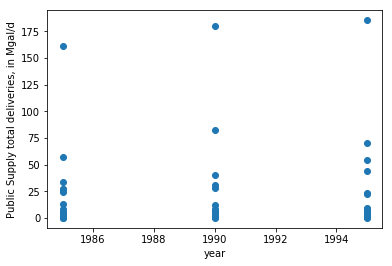

In [83]:
plt.plot(df['year'], df['Public Supply total deliveries, in Mgal/d'], marker='o', linewidth=0)
plt.xlabel('year')
plt.ylabel('Public Supply total deliveries, in Mgal/d')
plt.show()

In [17]:
tmp = pd.pivot_table(df,index=["year"],
               values=["Total Population total population of area, in thousands",
                       "Public Supply total self-supplied withdrawals, fresh, in Mgal/d"],
               aggfunc=np.sum)

col1 = tmp['Total Population total population of area, in thousands']
col2 = tmp['Public Supply total self-supplied withdrawals, fresh, in Mgal/d']

tmp['public supply per capita'] = col1/col2

tmp

Hello World


In [44]:
h2o = pd.pivot_table(df, values="Total Population total population of area, in thousands", 
               index=['county_nm'], 
               columns=['year'],
               aggfunc=np.sum)

In [40]:
pd.pivot_table(df, values="year", 
               index=['county_nm'], 
               columns=['year'],
               aggfunc=np.sum)

ValueError: Grouper for 'year' not 1-dimensional

### What is the overall objective of project one? What does the client want?

### What are the types of metrics you could examine to achieve the objective?

### What categories are included for the types of water in this dataset?

### For each category, which metrics are provided?

### How many columns are in Millions of Gallons per day (Mgal/d)?

### Which county has the most water usage?

In [26]:
df.columns[:5]

Index(['state_cd', 'state_name', 'county_cd', 'county_nm', 'year'], dtype='object')

In [32]:
df[list(df.columns[:10]) + ['Commercial deliveries from public supply, in Mgal/d']].head(10)

,state_cd,state_name,county_cd,county_nm,year,"Total Population total population of area, in thousands","Public Supply population served by groundwater, in thousands","Public Supply population served by surface water, in thousands","Public Supply total population served, in thousands","Public Supply self-supplied groundwater withdrawals, fresh, in Mgal/d","Commercial deliveries from public supply, in Mgal/d"
1,49,Utah,1,Beaver County,1985,5.200,4.57,0.00,4.570,1.69,0.11
2,49,Utah,1,Beaver County,1990,4.760,4.70,0.00,4.700,2.02,0.11
3,49,Utah,1,Beaver County,1995,5.380,4.58,0.00,4.580,1.85,0.32
4,49,Utah,1,Beaver County,2000,6.010,NaN,NaN,4.775,2.16,NaN
5,49,Utah,1,Beaver County,2005,6.341,NaN,NaN,5.120,1.96,NaN
6,49,Utah,1,Beaver County,2010,6.629,NaN,NaN,5.520,2.38,NaN
7,49,Utah,3,Box Elder County,1985,36.800,34.83,0.81,35.640,28.35,0.22
8,49,Utah,3,Box Elder County,1990,36.490,33.60,0.00,33.600,16.04,1.39
9,49,Utah,3,Box Elder County,1995,39.590,31.91,0.00,31.910,25.11,2.14
10,49,Utah,3,Box Elder County,2000,42.750,NaN,NaN,38.944,13.84,NaN


### Which county is increasing in water usage the fastest?

# what is the total population of utah by year

In [23]:
df["Total Population total population of area, in thousands"] = \
df["Total Population total population of area, in thousands"].astype(float).fillna(0.0)

In [33]:
pd.pivot_table(df,index=["year"],
               values=["Total Population total population of area, in thousands"],
               aggfunc=np.sum)

,"Total Population total population of area, in thousands"
year,
1985,1644.800
1990,1722.850
1995,1951.400
2000,2233.200
2005,2547.389
2010,2763.885


# what is the total water usage in utah by year

In [124]:
tmp = pd.pivot_table(df,index=["year"],
               values=["Total Population total population of area, in thousands",
                       "Public Supply total self-supplied withdrawals, fresh, in Mgal/d"],
               aggfunc=np.sum)

col1 = tmp['Total Population total population of area, in thousands']
col2 = tmp['Public Supply total self-supplied withdrawals, fresh, in Mgal/d']

tmp['public supply per capita'] = col1/col2

tmp

,"Public Supply total self-supplied withdrawals, fresh, in Mgal/d","Total Population total population of area, in thousands",public supply per capita
year,,,
1985,446.85,1644.800,3.680877
1990,508.46,1722.850,3.388369
1995,497.00,1951.400,3.926358
2000,637.82,2233.200,3.501301
2005,607.49,2547.389,4.193302
2010,670.00,2763.885,4.125201


In [ ]:
# by year, what is the total usage by category?

In [122]:
# how many rows are missing in one column
str( round( (df['Hydroelectric Power total power generated, in gigawatt-hours'].isnull().sum()) \
      / float(df.shape[0]) * 100 )) \
+ '%'

'83.0%'

In [ ]:
# what columns have high percentage of missing

In [117]:
summary_array = df.isnull().sum(axis=0) / df.shape[0] * 100
df2 = pd.DataFrame(summary_array)
df2 = df2.round(0)
df2.iloc[:,0].astype(str) + ' %'

state_cd                                                                                                 0.0 %
state_name                                                                                               0.0 %
county_cd                                                                                                0.0 %
county_nm                                                                                                0.0 %
year                                                                                                     0.0 %
Total Population total population of area, in thousands                                                  0.0 %
Public Supply population served by groundwater, in thousands                                            50.0 %
Public Supply population served by surface water, in thousands                                          50.0 %
Public Supply total population served, in thousands                                                      0.0 %
P

In [123]:
# sort and find the best columns

df2 = pd.DataFrame(df.isnull().sum(axis=0) / df.shape[0])
df2['Pct'] = pd.Series(["{0:.2f}%".format(val * 100) for val in df2[0]], index = df2.index)
df2.

,0,Pct
state_cd,0.000000,0.00%
state_name,0.000000,0.00%
county_cd,0.000000,0.00%
county_nm,0.000000,0.00%
year,0.000000,0.00%
"Total Population total population of area, in thousands",0.000000,0.00%
"Public Supply population served by groundwater, in thousands",0.500000,50.00%
"Public Supply population served by surface water, in thousands",0.500000,50.00%
"Public Supply total population served, in thousands",0.000000,0.00%
"Public Supply self-supplied groundwater withdrawals, fresh, in Mgal/d",0.000000,0.00%


In [80]:
# count missing by row ...
df['missing_on_row'] = df.count(axis=1)
df[list(df.columns[:5])+['missing_on_row']]

,state_cd,state_name,county_cd,county_nm,year,missing_on_row
1,49,Utah,1,Beaver County,1985,107
2,49,Utah,1,Beaver County,1990,118
3,49,Utah,1,Beaver County,1995,209
4,49,Utah,1,Beaver County,2000,82
5,49,Utah,1,Beaver County,2005,89
6,49,Utah,1,Beaver County,2010,125
7,49,Utah,3,Box Elder County,1985,107
8,49,Utah,3,Box Elder County,1990,118
9,49,Utah,3,Box Elder County,1995,209
10,49,Utah,3,Box Elder County,2000,82


# viz

In [154]:
tmp = pd.pivot_table(df,index=["year"],
               values=["Total Population total population of area, in thousands",
                       "Public Supply total self-supplied withdrawals, fresh, in Mgal/d"],
               aggfunc=np.sum)

col1 = tmp['Total Population total population of area, in thousands']
col2 = tmp['Public Supply total self-supplied withdrawals, fresh, in Mgal/d']

tmp['public supply per capita'] = col2/col1

tmp

,"Public Supply total self-supplied withdrawals, fresh, in Mgal/d","Total Population total population of area, in thousands",public supply per capita
year,,,
1985,446.85,1644.800,0.271674
1990,508.46,1722.850,0.295127
1995,497.00,1951.400,0.254689
2000,637.82,2233.200,0.285608
2005,607.49,2547.389,0.238476
2010,670.00,2763.885,0.242412


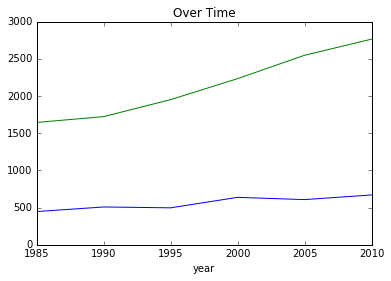

In [155]:
# plot metric by year
%matplotlib inline

plot1 = tmp.iloc()[:,0:2].plot(title='Over Time' , legend=False)



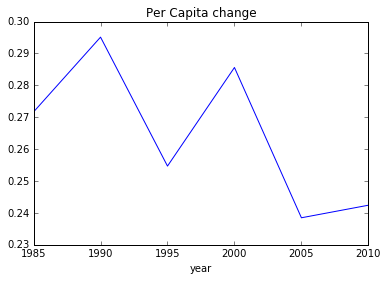

In [156]:
plot1 = tmp.iloc()[:,2].plot(title='Per Capita change' , legend=False)

The per capita of total self supplied withdrawals is decreasing for the entire state of Utah.

# which couties have increased the most?

In [152]:
tmp2 = pd.pivot_table(df,index=["year",'county_nm'],
               values=["Total Population total population of area, in thousands",
                       "Public Supply total self-supplied withdrawals, fresh, in Mgal/d"],
               aggfunc=np.sum)

col1 = tmp2['Total Population total population of area, in thousands']
col2 = tmp2['Public Supply total self-supplied withdrawals, fresh, in Mgal/d']

tmp2['public supply per capita'] = col2/col1

tmp2

Public Supply total self-supplied withdrawals, fresh, in Mgal/d  \
year county_nm                                                                            
1985 Beaver County                                                   1.69                 
     Box Elder County                                               29.32                 
     Cache County                                                   27.47                 
     Carbon County                                                   6.29                 
     Daggett County                                                  0.25                 
     Davis County                                                   34.48                 
     Duchesne County                                                 2.93                 
     Emery County                                                    1.99                 
     Garfield County                                                 1.97                 
     Grand County                                                    4.63                 
     Iron County                                                     4.53                 
     Juab County                                                     3.35                 
     Kane County                                                     1.95                 
     Millard County                                                  2.48                 
     Morgan County                                                   0.97                 
     Piute County                                                    0.67                 
     Rich County                                                     0.16                 
     Salt Lake County                                              172.90                 
     San Juan County                                                 3.48                 
     Sanpete County                                                  3.22                 
     Sevier County                                                   4.22                 
     Summit County                                                   4.88                 
     Tooele County                                                   9.55                 
     Uintah County                                                   5.68                 
     Utah County                                                    67.34                 
     Wasatch County                                                  3.29                 
     Washington County                                              14.04                 
     Wayne County                                                    0.58                 
     Weber County                                                   32.54                 
1990 Beaver County                                                   2.02                 
...                                                                   ...                 
2005 Weber County                                                   54.11                 
2010 Beaver County                                                   2.38                 
     Box Elder County                                               15.89                 
     Cache County                                                   33.47                 
     Carbon County                                                   6.18                 
     Daggett County                                                  0.82                 
     Davis County                                                   41.57                 
     Duchesne County                                                 4.68                 
     Emery County                                                    2.01                 
     Garfield County                                                 0.86                 
     Grand County                                                    3.31                 
     Iron County    

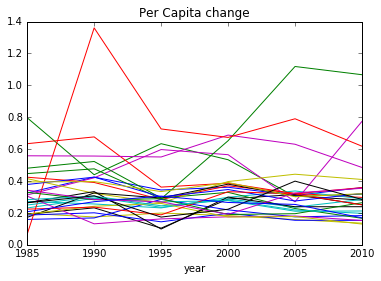

In [153]:

# pivot the table so every row is a year and columns are the counties
tmp3 = tmp2.iloc()[:,2].unstack(level=-1)


plot3 = tmp3.iloc()[:,:].plot(title='Per Capita change' , legend=False)

In [170]:
# which counties are decreasing the most?

# a table with counties, the percent increase, and the total increase

tmp4 = tmp2.iloc()[:,2].unstack(level=0)

# how to add a column that is the mean over all years?
tmp4['avg'] = tmp4.mean(numeric_only=True, axis=1)

# by row sum all the columns then devide by num of columns
# or by row take the mean of all columns 


# sort by the largest population change on top
tmp4.sort_values('avg', ascending=False ).head(10)

year,1985,1990,1995,2000,2005,2010,avg
county_nm,,,,,,,
Rich County,0.066667,1.360465,0.726776,0.673469,0.790495,0.618375,0.706041
Piute County,0.446667,0.476562,0.288732,0.652778,1.118421,1.066838,0.675000
Juab County,0.558333,0.556701,0.550898,0.688107,0.630711,0.485067,0.578303
Box Elder County,0.796739,0.439572,0.634251,0.533567,0.302402,0.317959,0.504082
Daggett County,0.312500,0.420290,0.597403,0.565217,0.269990,0.774315,0.489952
Grand County,0.634247,0.676737,0.361893,0.386337,0.320644,0.358808,0.456444
Kane County,0.414894,0.323017,0.263333,0.396694,0.442763,0.409825,0.375088
Washington County,0.394382,0.396417,0.333805,0.391146,0.301745,0.320385,0.356313
Beaver County,0.325000,0.424370,0.343866,0.361065,0.309100,0.359029,0.353738


### What categories are included for the types of water in this dataset?

In [172]:
df.head()

,state_cd,state_name,county_cd,county_nm,year,"Total Population total population of area, in thousands","Public Supply population served by groundwater, in thousands","Public Supply population served by surface water, in thousands","Public Supply total population served, in thousands","Public Supply self-supplied groundwater withdrawals, fresh, in Mgal/d",...,"Hydroelectric Power power generated by instream use, in gigawatt-hours","Hydroelectric Power power generated by offstream use, in gigawatt-hours","Hydroelectric Power total power generated, in gigawatt-hours",Hydroelectric Power number of instream facilities,Hydroelectric Power number of offstream facilities,Hydroelectric Power total number of facilities,"Wastewater Treatment returns by public wastewater facilities, in Mgal/d",Wastewater Treatment number of public wastewater facilities,"Wastewater Treatment reclaimed wastewater released by wastewater facilities, in Mgal/d",missing_on_row
1,49,Utah,1,Beaver County,1985,5.200,4.57,0.0,4.570,1.69,...,11.44,NaN,NaN,NaN,NaN,NaN,0.41,2.0,NaN,107
2,49,Utah,1,Beaver County,1990,4.760,4.70,0.0,4.700,2.02,...,10.34,NaN,NaN,3.0,NaN,NaN,0.15,1.0,NaN,118
3,49,Utah,1,Beaver County,1995,5.380,4.58,0.0,4.580,1.85,...,20.11,0.0,20.11,4.0,0.0,4.0,0.00,0.0,NaN,209
4,49,Utah,1,Beaver County,2000,6.010,NaN,NaN,4.775,2.16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82
5,49,Utah,1,Beaver County,2005,6.341,NaN,NaN,5.120,1.96,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89


one option, first find the couties that move then move in

In [ ]:
# how to find all the columns with 'total consumptive use'

In [183]:
consumptive_calls = [col for col in df.columns if 'total consumpt' in col]

df[ list(df.columns[3:5]) + consumptive_calls]

,county_nm,year,"Domestic total consumptive use, in Mgal/d","Commercial total consumptive use, in Mgal/d","Industrial total consumptive use, in Mgal/d","Total Thermoelectric Power total consumptive use, in Mgal/d","Fossil-fuel Thermoelectric Power total consumptive use, in Mgal/d","Geothermal Thermoelectric Power total consumptive use, in Mgal/d","Nuclear Thermoelectric Power total consumptive use, in Mgal/d","Thermoelectric Power (Once-through cooling) total consumptive use, in Mgal/d","Thermoelectric Power (Closed-loop cooling) total consumptive use, in Mgal/d","Mining total consumptive use, in Mgal/d","Livestock (Stock) total consumptive use, in Mgal/d","Livestock (Animal Specialties) total consumptive use, in Mgal/d","Aquaculture total consumptive use, in Mgal/d","Irrigation, Total total consumptive use, in Mgal/d"
1,Beaver County,1985,NaN,NaN,0.03,0.52,0.00,0.52,0.0,NaN,NaN,0.00,NaN,NaN,NaN,NaN
2,Beaver County,1990,NaN,NaN,0.34,0.03,0.00,0.03,0.0,NaN,NaN,0.00,NaN,NaN,NaN,NaN
3,Beaver County,1995,0.52,0.15,0.01,0.32,0.00,0.32,0.0,NaN,NaN,0.00,0.66,0.02,NaN,64.50
4,Beaver County,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Beaver County,2005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Beaver County,2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
7,Box Elder County,1985,NaN,NaN,1.02,0.00,0.00,0.00,0.0,NaN,NaN,0.00,NaN,NaN,NaN,NaN
8,Box Elder County,1990,NaN,NaN,0.93,0.00,0.00,0.00,0.0,NaN,NaN,0.00,NaN,NaN,NaN,NaN
9,Box Elder County,1995,2.54,0.64,0.91,0.00,0.00,0.00,0.0,NaN,NaN,0.00,1.25,0.02,NaN,200.06
10,Box Elder County,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [184]:
# what is the aggregate consumptive use for all categories by county?

In [194]:
#  filter all rows for just the most recent year?
df[ list(df.columns[3:5]) + consumptive_calls][df.year == 1995]

,county_nm,year,"Domestic total consumptive use, in Mgal/d","Commercial total consumptive use, in Mgal/d","Industrial total consumptive use, in Mgal/d","Total Thermoelectric Power total consumptive use, in Mgal/d","Fossil-fuel Thermoelectric Power total consumptive use, in Mgal/d","Geothermal Thermoelectric Power total consumptive use, in Mgal/d","Nuclear Thermoelectric Power total consumptive use, in Mgal/d","Thermoelectric Power (Once-through cooling) total consumptive use, in Mgal/d","Thermoelectric Power (Closed-loop cooling) total consumptive use, in Mgal/d","Mining total consumptive use, in Mgal/d","Livestock (Stock) total consumptive use, in Mgal/d","Livestock (Animal Specialties) total consumptive use, in Mgal/d","Aquaculture total consumptive use, in Mgal/d","Irrigation, Total total consumptive use, in Mgal/d"
3,Beaver County,1995,0.52,0.15,0.01,0.32,0.00,0.32,0.0,NaN,NaN,0.00,0.66,0.02,NaN,64.50
9,Box Elder County,1995,2.54,0.64,0.91,0.00,0.00,0.00,0.0,NaN,NaN,0.00,1.25,0.02,NaN,200.06
15,Cache County,1995,5.39,1.99,1.64,0.00,0.00,0.00,0.0,NaN,NaN,0.00,1.47,0.07,NaN,140.48
21,Carbon County,1995,1.33,0.15,0.26,2.66,2.66,0.00,0.0,NaN,NaN,0.36,0.11,0.00,NaN,47.52
27,Daggett County,1995,0.13,0.02,0.00,0.00,0.00,0.00,0.0,NaN,NaN,0.00,0.04,0.00,NaN,11.86
33,Davis County,1995,11.64,2.18,2.47,0.00,0.00,0.00,0.0,NaN,NaN,0.00,0.25,0.02,NaN,68.15
39,Duchesne County,1995,0.48,0.03,0.21,0.00,0.00,0.00,0.0,NaN,NaN,0.00,0.59,0.02,NaN,126.49
45,Emery County,1995,0.57,0.08,0.66,24.24,24.24,0.00,0.0,NaN,NaN,0.32,0.30,0.01,NaN,87.32
51,Garfield County,1995,0.41,0.08,0.00,0.00,0.00,0.00,0.0,NaN,NaN,0.00,0.19,0.01,NaN,22.38
57,Grand County,1995,0.50,0.17,0.01,0.00,0.00,0.00,0.0,NaN,NaN,0.84,0.04,0.00,NaN,4.45


In [ ]:
# sort by which are the biggest users by average volume

In [ ]:
# take the top counties by average volume and plot them over time

In [ ]:
plot3 = tmp3.iloc()[:,:].plot(title='Per Capita change' , legend=False)

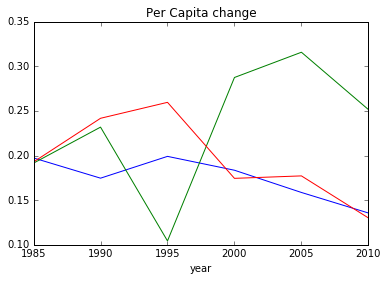

In [202]:
cols_to_plot = [5,6,19]

tmp3.iloc()[:,cols_to_plot]

plot3 = tmp3.iloc()[:,cols_to_plot].plot(title='Per Capita change' , legend=False)